In [1]:
pwd

'/mmfs1/data/aglinska/BC-actionpred-seg'

In [2]:
import PIL
from PIL import Image,ImageFilter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
from scipy.ndimage.filters import gaussian_filter
import os
import shutil
import random
import cv2

/data/aglinska/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
indir = '~/BC-actionpred-seg/Data/haa500_v1_1_yolo_seg4'
indir = os.path.expanduser(indir)
indir

'/data/aglinska/BC-actionpred-seg/Data/haa500_v1_1_yolo_seg4'

In [4]:
folders = [folder for folder in os.listdir(indir) if not folder.startswith('.')]
folders.sort()
n = len(folders)
print(n)
folders[0:3]

499


['ALS_IceBucket_Challenge', 'CPR', 'abseiling']

(20, 499)


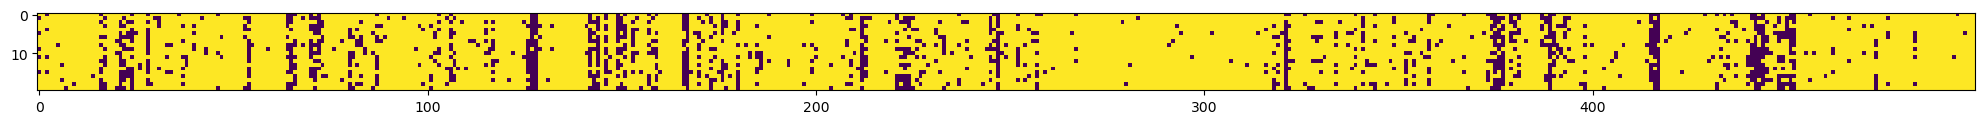

In [5]:
good_videos = np.load('good_videos.npy')
print(good_videos.shape)
plt.figure(figsize=(25,5))
plt.imshow(good_videos)

### Count people in vids

In [6]:
yolo_labels = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
people_count = np.zeros((20,499))
for f in tqdm(range(499)):
    for v in range(20):
        if bool(good_videos[v,f])==True:
            folder = folders[f]
            video = v
            fn = f'./Data/haa500_v1_1_frames/video/{folder}/{folder}_{video:03d}/{folder}_{video:03d}_000_box.npy'
            box = np.load(fn)
            npeople_in_vid = np.array(np.array([yolo_labels[int(box[i,-1])] for i in range(box.shape[0])])=='person').sum()
            people_count[v,f] = npeople_in_vid
            #people_count.append(npeople_in_vid)

100%|██████████████████████████████████████████████████████████████████████████████| 499/499 [00:28<00:00, 17.40it/s]


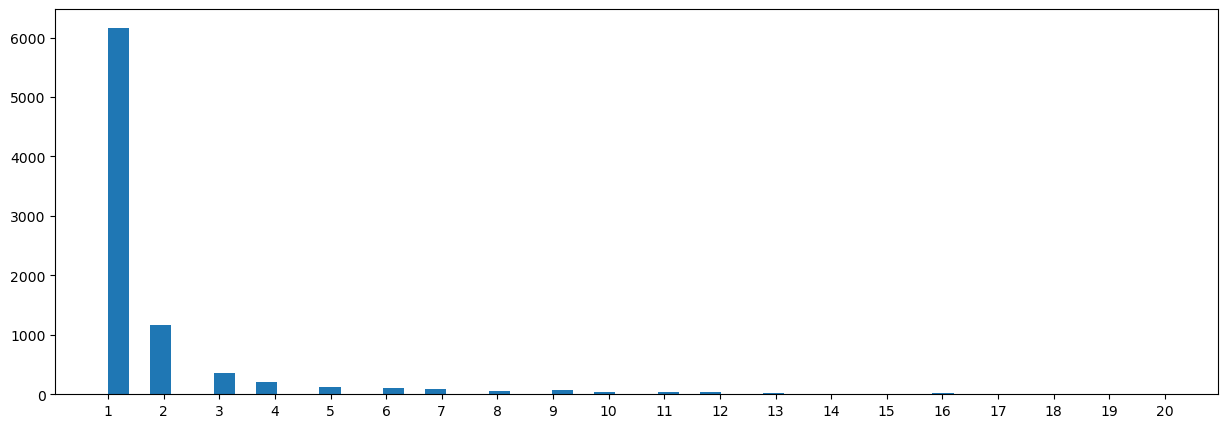

In [9]:
plt.figure(figsize=(15,5))
plt.hist(people_count[good_videos==1],bins=50);
plt.xticks(np.unique(people_count[good_videos==1]));

In [10]:
(people_count[good_videos==1]==1).mean()

0.7228407359662486

In [11]:
(people_count[good_videos==1]==1).sum()

6168

In [16]:
good_videos_1p = good_videos.astype(np.bool_)*people_count.astype(np.bool_)

In [20]:
np.save('good_videos_1p.npy',good_videos_1p)

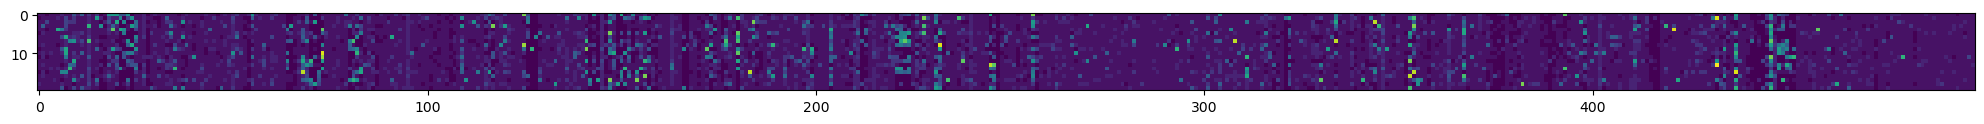

In [119]:
plt.figure(figsize=(25,5))
plt.imshow(people_count)

### Video lenghts 

In [ ]:
import skvideo
import skvideo.io

In [174]:
video_durations = np.zeros(good_videos.shape)
for f in tqdm(range(n)):
    for v in range(20):
        if bool(good_videos[v,f])==True:
            folder = folders[f]
            fn = f'{indir}/{folder}/{folder}_{v:03d}_item_0_masks.npy'
            fn = fn.replace('_item_0_masks.npy','.mp4')
            metadata = skvideo.io.ffprobe(fn)
            video_durations[v,f] = float(metadata['video']['@duration'])

100%|█████████████████████████████████████████████████████████████████████████████████| 499/499 [03:59<00:00,  2.09it/s]


(array([7.46e+03, 9.26e+02, 1.07e+02, 1.90e+01, 1.10e+01, 4.00e+00,
        1.00e+00, 2.00e+00, 2.00e+00, 1.00e+00]),
 array([ 0.24 ,  3.752,  7.264, 10.776, 14.288, 17.8  , 21.312, 24.824,
        28.336, 31.848, 35.36 ]),
 <BarContainer object of 10 artists>)

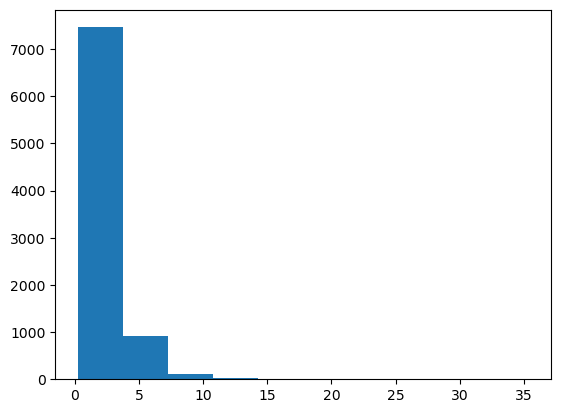

In [176]:
plt.hist(video_durations[good_videos==True])

In [198]:
(video_durations[good_videos==True]>5).sum()

466

In [199]:
video_durations.max()

35.36

In [197]:
(video_durations[good_videos==True]<5).mean()

0.943747802648541

In [178]:
video_durations[good_videos==True].mean()

2.3875635767022145

In [181]:
(video_durations[good_videos==True]>10).sum()

55

In [186]:
video_durations_copy = video_durations.copy()
video_durations_copy[good_videos==False]=np.nan

Text(0, 0.5, 'avg length (s)')

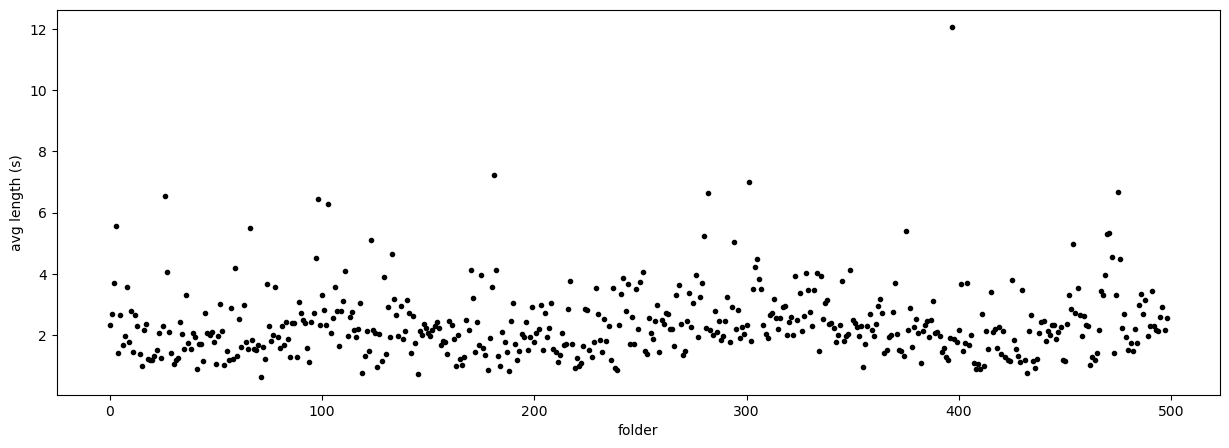

In [195]:
plt.figure(figsize=(15,5))
plt.plot(np.nanmean(video_durations_copy,axis=0),'k.')
plt.xlabel('folder')
plt.ylabel('avg length (s)')